# Access and plot AROME Arctic weather forecasts

In [2]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 1s (55.9 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 133.1 MB 25 kB/s 
     |█

##### Specify the file on the thredds server. For example the full file of latest forecast of the AROME Arctic weather model. Note, at this point only metadata is retrieved

In [ ]:
url='https://thredds.met.no//thredds/dodsC/aromearcticlatest/arome_arctic_full_2_5km_latest.nc'
#url='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_full_2_5km_20210908T03Z.nc'
dataset = xr.open_dataset(url)

### Metadata

In [ ]:
dataset

<xarray.Dataset>
Dimensions:                                                                      (atmosphere_as_single_layer: 1, grib1_vLevel6: 1, height0: 1, height1: 1, height2: 1, height3: 3, height4: 1, height5: 10, height6: 1, height7: 1, height_above_msl: 1, hybrid: 65, time: 67, top_of_atmosphere: 1, x: 739, y: 949)
Coordinates: (12/18)
  * time                                                                         (time) datetime64[ns] ...
  * height_above_msl                                                             (height_above_msl) float32 ...
  * height0                                                                      (height0) float32 ...
  * height1                                                                      (height1) float32 ...
  * height2                                                                      (height2) float32 ...
  * height3                                                                      (height3) float32 ...
    ...                                                                           ...
  * grib1_vLevel6                                                                (grib1_vLevel6) float32 ...
  * top_of_atmosphere                                                            (top_of_atmosphere) int16 ...
  * x                                                                            (x) float32 ...
  * y                                                                            (y) float32 ...
    longitude                                                                    (y, x) float64 ...
    latitude                                                                     (y, x) float64 ...
Data variables: (12/104)
    forecast_reference_time                                                      datetime64[ns] ...
    p0                                                                           float64 ...
    ap                                                                           (hybrid) float64 ...
    b                                                                            (hybrid) float64 ...
    projection_lambert                                                           int32 ...
    liquid_water_content_of_surface_snow                                         (time, height0, y, x) float32 ...
    ...                                                                           ...
    integral_of_surface_net_downward_longwave_flux_wrt_time_assuming_clear_sky   (time, height6, y, x) float32 ...
    integral_of_surface_parallel_solar_flux_wrt_time                             (time, height0, y, x) float32 ...
    tmp_116_253_251_8                                                            (time, top_of_atmosphere, y, x) float32 ...
    tmp_140_253_251_105                                                          (time, height0, y, x) float32 ...
    integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time               (time, height0, y, x) float32 ...
    integral_of_surface_downwelling_longwave_flux_in_air_wrt_time                (time, height0, y, x) float32 ...
Attributes: (12/17)
    Conventions:                     CF-1.6
    institution:                     Norwegian Meteorological Institute, MET ...
    creator_url:                     met.no
    summary:                         AROME_Arctic is a convection-permitting ...
    source:                          AROME_Arctic 2.5km
    title:                           AROME_Arctic 2.5km
    ...                              ...
    geospatial_lon_max:              80.0
    references:                      unknown
    license:                         https://www.met.no/frie-meteorologiske-d...
    comment:                         none
    history:                         2021-09-08T05:20:06 creation by fimex
    DODS_EXTRA.Unlimited_Dimension:  time

### Find a specific point and plot the forecast. 
###### Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [3]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [ ]:
[ix,jx] = findindex(dataset.latitude,dataset.longitude,78.55,11.56) # changed Longyearbyen for ny ålesund

In [ ]:
t2m_point = dataset.air_temperature_2m[:,0,ix,jx]

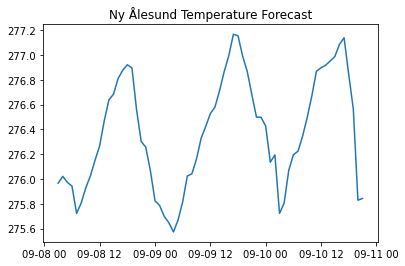

In [ ]:
from matplotlib import pyplot as plt

plt.plot(dataset.time, t2m_point, '-')

plt.title("Ny Ålesund Temperature Forecast")
plt.show()

### Plot one forecast on a map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'extemd'


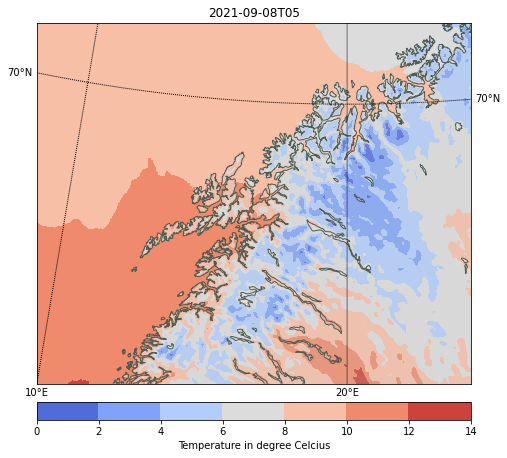

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

timestep = 2
fig = plt.figure(figsize=(14.4,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(121)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='h', 
            llcrnrlat= 66.0, urcrnrlat=71.0, llcrnrlon=10.0, urcrnrlon=25.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(dataset.longitude),np.array(dataset.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( dataset.air_temperature_2m[timestep,0,:,:])-273.15,cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(dataset.time[timestep],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius') 

### 1. Explore the metadata of the files arome_arctic_full / arome_arctic_pp / arome_arctic_sfx Speculate what they could mean.

I ran this model at around 12-13 o'clock 8th of september 2020. and compared my results to yr around 13 0'clock.

In [7]:
#Using arctic_pp
url='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_pp_2_5km_latest.nc'
dataset = xr.open_dataset(url)


<xarray.Dataset>
Dimensions:                               (height0: 1, height1: 1, height3: 1, height_above_msl: 1, p0: 1, time: 67, x: 719, y: 929)
Coordinates:
  * time                                  (time) datetime64[ns] 2021-09-08T09...
  * height_above_msl                      (height_above_msl) float32 0.0
  * height0                               (height0) float32 0.0
  * height1                               (height1) float32 2.0
  * height3                               (height3) float32 10.0
  * x                                     (x) float32 3.036e+05 ... 2.099e+06
  * y                                     (y) float32 -8.729e+05 ... 1.447e+06
  * p0                                    (p0) float32 1.013e+03
    longitude                             (y, x) float64 ...
    latitude                              (y, x) float64 ...
Data variables: (12/25)
    forecast_reference_time               datetime64[ns] ...
    projection_lambert                    int32 ...
    surface_air_pressure                  (time, height0, y, x) float32 ...
    relative_humidity_2m                  (time, height1, y, x) float32 ...
    x_wind_10m                            (time, height3, y, x) float32 ...
    y_wind_10m                            (time, height3, y, x) float32 ...
    ...                                    ...
    medium_type_cloud_area_fraction       (time, y, x) float32 ...
    helicopter_triggered_index            (time, y, x) float32 ...
    number_of_tracks                      (time, y, x) float32 ...
    strike_probability                    (time, y, x) float32 ...
    air_temperature_2m                    (time, height1, y, x) float32 ...
    altitude                              (y, x) float32 ...
Attributes: (12/20)
    Conventions:                     CF-1.0
    institution:                     Norwegian Meteorological Institute
    creator_url:                     met.no
    summary:                         AROME_Arctic is a convection-permitting ...
    title:                           unknown
    min_time:                        2021-09-08 09:00:00Z
    ...                              ...
    history:                         2021-09-08T11:20:40 creation by fimex
    nco_openmp_thread_number:        1
    NCO:                             4.0.8
    source:                          arome_arctic
    model_type:                      AROME-Arctic
    DODS_EXTRA.Unlimited_Dimension:  time

In [ ]:
dataset

<xarray.Dataset>
Dimensions:                               (height0: 1, height1: 1, height3: 1, height_above_msl: 1, p0: 1, time: 67, x: 719, y: 929)
Coordinates:
  * time                                  (time) datetime64[ns] 2021-09-08T06...
  * height_above_msl                      (height_above_msl) float32 0.0
  * height0                               (height0) float32 0.0
  * height1                               (height1) float32 2.0
  * height3                               (height3) float32 10.0
  * x                                     (x) float32 3.036e+05 ... 2.099e+06
  * y                                     (y) float32 -8.729e+05 ... 1.447e+06
  * p0                                    (p0) float32 1.013e+03
    longitude                             (y, x) float64 ...
    latitude                              (y, x) float64 ...
Data variables: (12/25)
    forecast_reference_time               datetime64[ns] ...
    projection_lambert                    int32 ...
    surface_air_pressure                  (time, height0, y, x) float32 ...
    relative_humidity_2m                  (time, height1, y, x) float32 ...
    x_wind_10m                            (time, height3, y, x) float32 ...
    y_wind_10m                            (time, height3, y, x) float32 ...
    ...                                    ...
    medium_type_cloud_area_fraction       (time, y, x) float32 ...
    helicopter_triggered_index            (time, y, x) float32 ...
    number_of_tracks                      (time, y, x) float32 ...
    strike_probability                    (time, y, x) float32 ...
    air_temperature_2m                    (time, height1, y, x) float32 ...
    altitude                              (y, x) float32 ...
Attributes: (12/20)
    Conventions:                     CF-1.0
    institution:                     Norwegian Meteorological Institute
    creator_url:                     met.no
    summary:                         AROME_Arctic is a convection-permitting ...
    title:                           unknown
    min_time:                        2021-09-08 06:00:00Z
    ...                              ...
    history:                         2021-09-08T08:20:28 creation by fimex
    nco_openmp_thread_number:        1
    NCO:                             4.0.8
    source:                          arome_arctic
    model_type:                      AROME-Arctic
    DODS_EXTRA.Unlimited_Dimension:  time

Comparing the dataset from the arctic_full and arctic_pp, one can se that the full includes a longer list of dimensions, where pp have what apperes to be Precipitation


In [ ]:
#Using arctic_sfx
url='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_sfx_2_5km_latest.nc'
dataset = xr.open_dataset(url)


In [ ]:
dataset

<xarray.Dataset>
Dimensions:                  (time: 67, x: 739, y: 949)
Coordinates:
  * time                     (time) datetime64[ns] 2021-09-08T06:00:00 ... 20...
  * x                        (x) float32 2.786e+05 2.811e+05 ... 2.124e+06
  * y                        (y) float32 -8.979e+05 -8.954e+05 ... 1.472e+06
    longitude                (y, x) float64 ...
    latitude                 (y, x) float64 ...
Data variables: (12/234)
    forecast_reference_time  datetime64[ns] ...
    projection_lambert       int32 ...
    TICE_01                  (time, y, x) float32 ...
    TICE_02                  (time, y, x) float32 ...
    TICE_03                  (time, y, x) float32 ...
    TICE_04                  (time, y, x) float32 ...
    ...                       ...
    FMVC                     (time, y, x) int16 ...
    CD                       (time, y, x) float32 ...
    CH                       (time, y, x) float32 ...
    CE                       (time, y, x) float32 ...
    Z0                       (time, y, x) float32 ...
    Z0H                      (time, y, x) float32 ...
Attributes: (12/17)
    Conventions:                     CF-1.6
    institution:                     Norwegian Meteorological Institute, MET ...
    creator_url:                     met.no
    summary:                         AROME_Arctic is a convection-permitting ...
    source:                          AROME_Arctic 2.5km (SURFEX)
    title:                           AROME_Arctic 2.5km (SURFEX)
    ...                              ...
    geospatial_lon_max:              80.0
    references:                      unknown
    license:                         https://www.met.no/frie-meteorologiske-d...
    comment:                         none
    history:                         2021-09-08T08:20:17 creation by fimex
    DODS_EXTRA.Unlimited_Dimension:  time

### 2. Make your own weather forecast for a certain region + location. Describe how the weather system will change (e.g. surface pressure or Geopotential height) and the implications for wind, temperature, and precipitation for the coming days. Compare it with yr.no.

In [7]:
#Using arctic_sfx
url='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_full_2_5km_latest.nc'
dataset = xr.open_dataset(url)

In [8]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [9]:
[ix,jx] = findindex(dataset.latitude,dataset.longitude,67.52,12.58) # Å, Lofoten

KeyboardInterrupt: ignored

In [ ]:
t2m_point = dataset.air_temperature_2m[:,0,ix,jx]

In [ ]:
pressure_point = dataset.air_pressure_at_sea_level[:,0,ix,jx]

In [ ]:
pp_point = dataset.precipitation_amount_acc[:,0,ix,ix]

In [ ]:
wind_point = dataset.wind_speed[:,0,ix,jx]

In [ ]:
from matplotlib import pyplot as plt

plt.plot(dataset.time, t2m_point, '-')

plt.title("Å Temperature Forecast")
plt.show()

The temperature in Å is not changing much over the next day, though the temperature has a negative trend. The night to the 10th of september is going to be the coldest of the forcasted period, followed by a temperature increase of about 1,5 K in th emorning hours. 

Compared to the temp forecast on yr.no, the temperatures are quite similar.

In [ ]:
from matplotlib import pyplot as plt

plt.plot(dataset.time,pressure_point,'-')

plt.title("Å Pressure Forecast")
plt.show()

The pressure in Å is steadily increasing throughout the forcasted period.
Compared to the pressure forecast at yr.no they seem to be in unison.

In [ ]:
from matplotlib import pyplot as plt

plt.plot(dataset.time, pp_point, '-')

plt.title("Å Precipitation Forecast")
plt.show()

The forecast shows an increase precipitation around midningt 09.09.2021, and 12 o'clock 10.09.2021. 

Compared to The forecast at yr.no the precipitation forcasts differ. Yr says one can expect from 0-0,2 or 0-0,3 mm each hour from 13-18, wich can possibly fit with my forecast. Yr is reporting 0 precipitation from around 19 o'clock the 8th of september to around 05 o'clock the 9th of september, where my forecast says a lot of precipitation is going to occur in that interval. My forecast and yr differs when you consider precipitation. 

In [10]:
from matplotlib import pyplot as plt

plt.plot(dataset.time, wind_point, '-')

plt.title("Å Wind speed Forecast")
plt.show()

NameError: ignored

Winds speeds may varry a bit in the forcasted period.

Comared to yr, my forcasted windspeeds are a little high (not considering the wind gusts, where my forcasted wind is too low copared to yr). For example my forecast says that around 18 o'cock the 8th of september the winds have a speed of about 11 m/s, but yr is forecasting 8 m/s.

### Plot the temperature and wind forecast from AROMEArctic as a map for February 04 14:00 UTC. And a point-forecast initialized on February 04 00:00 UTC  for Tromsø. The forecast date is related to a polar low which made landfall this year directly at Tromsø. 

In [11]:
url='https://thredds.met.no/thredds/dodsC/meps25epsarchive/2020/02/04/meps_det_2_5km_20200204T12Z.nc'
dataset = xr.open_dataset(url)

In [12]:
[ix,jx] = findindex(dataset.latitude,dataset.longitude,69.40,18.56)

In [13]:
t2m_point = dataset.air_temperature_2m[:,0,ix,jx]

In [14]:
wind_point = dataset.wind_speed[:,0,ix,jx]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'extemd'


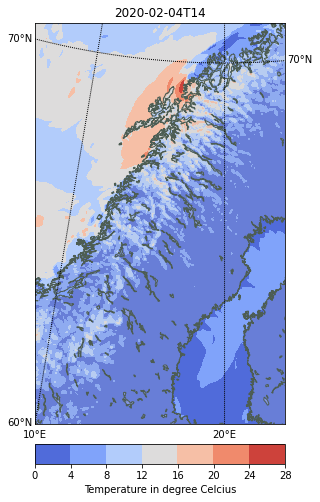

In [15]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

timestep = 2
fig = plt.figure(figsize=(14.4,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(121)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='h', 
            llcrnrlat= 60.0, urcrnrlat=71.0, llcrnrlon=10.0, urcrnrlon=25.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(dataset.longitude),np.array(dataset.latitude))               # compute map proj coordinates.

#cs=m.contourf(x,y,np.array( dataset.air_temperature_2m[timestep,0,:,:])-273.15,cmap=plt.cm.coolwarm,extemd='max')
#plt.title (np.datetime_as_string(dataset.time[timestep],unit='h'))
#cbar = m.colorbar(cs,location='bottom',pad="5%")  
#cbar.set_label('Temperature in degree Celcius') 

cs=m.contourf(x,y,np.array( dataset.wind_speed[timestep,0,:,:]),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(dataset.time[timestep],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Wind speed') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'extemd'


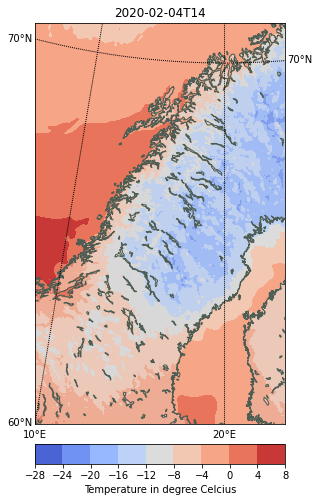

In [16]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

timestep = 2
fig = plt.figure(figsize=(14.4,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(121)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='h', 
            llcrnrlat= 60.0, urcrnrlat=71.0, llcrnrlon=10.0, urcrnrlon=25.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(dataset.longitude),np.array(dataset.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( dataset.air_temperature_2m[timestep,0,:,:])-273.15,cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(dataset.time[timestep],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius') 



In [17]:
url='https://thredds.met.no/thredds/dodsC/meps25epsarchive/2020/02/04/meps_det_2_5km_20200204T12Z.nc'
dataset = xr.open_dataset(url)

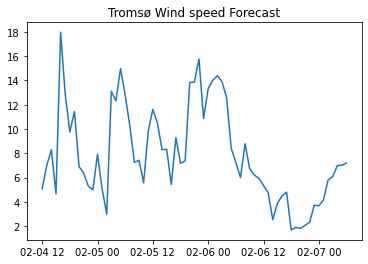

In [18]:
from matplotlib import pyplot as plt

plt.plot(dataset.time, wind_point, '-')

plt.title("Tromsø Wind speed Forecast")
plt.show()

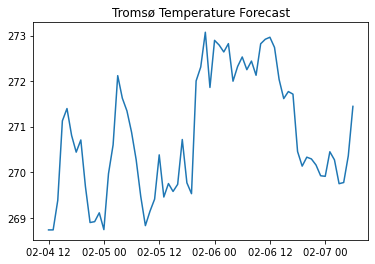

In [19]:
from matplotlib import pyplot as plt

plt.plot(dataset.time, t2m_point, '-')

plt.title("Tromsø Temperature Forecast")
plt.show()